
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up ?for their appointment. A number of characteristics about the patient are included in each row.

> - **ScheduledDay**: tells us on what day the patient set up their appointment.
> - **Neighborhood**: indicates the location of the hospital.
> - **Scholarship**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> - **No-show**: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
> - **PatientId**: The Patient Identification number in the hospital	
> - **AppointmentID**:	The appointment identification number in the hospital.
> - **Gender**: Tell  us about the patient sex.
> - **AppointmentDay**: tells us on what day the patient show up their appointment.	
> - **Age**: tells us about the age of pattient.	
> - **Hipertension**: If the patient has this disease.
> - **Diabetes**: If the patient has this disease.
> - **Alcoholism**: If the patient has this disease.
> - **Handcap***: If the patient has this disease.
> - **SMS_received**: If the patient received notification for the appointment.


### Question(s) for Analysis 
>    1. Is the number of gender equals through the dataset ?
>    2. Is the case that a patient get scholarship will help to show up ?
>    3. What days of week patient sow up easily for they appointment ?
>    4. Is patient going to show up wether they are sick or not ?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [2166 lines of output]
      /tmp/pip-install-n35q4670/pandas_914e9f49a8da4bd487eae15b4ba787a8/setup.py:53: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-3.9
      creating build/lib.linux-x86_64-3.9/pandas
      copying pandas/_typing.py -> build/lib.linux-x86_64-3.9/pandas
      copying pandas/testing.py -> build/lib.linux-x86_64-3.9/pandas
      copying pandas/conftest.py -> build/lib.linux-x86_64-3.9/pandas
      copying pandas/_version.py -> build/lib.linux-x86_64-3.9/pandas
      copying pandas/__init__.py -> build/lib.linux-x86_64-3.9/pand

                       from /home/ayifa/anaconda3/include/python3.9/Python.h:93,
                       from pandas/io/sas/sas.c:31:
      /home/ayifa/anaconda3/include/python3.9/cpython/unicodeobject.h:446:26: note: declared here
        446 | static inline Py_ssize_t _PyUnicode_get_wstr_length(PyObject *op) {
            |                          ^~~~~~~~~~~~~~~~~~~~~~~~~~
      pandas/io/sas/sas.c:22475:25: warning: ‘_PyUnicode_get_wstr_length’ is deprecated [-Wdeprecated-declarations]
      22475 |                         (PyUnicode_GET_SIZE(**argname) != PyUnicode_GET_SIZE(key)) ? 1 :
            |                         ^
      In file included from /home/ayifa/anaconda3/include/python3.9/unicodeobject.h:1026,
                       from /home/ayifa/anaconda3/include/python3.9/Python.h:93,
                       from pandas/io/sas/sas.c:31:
      /home/ayifa/anaconda3/include/python3.9/cpython/unicodeobject.h:446:26: note: declared here
        446 | static inline Py_ssize_t _P

Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.3
    Uninstalling pandas-1.4.3:
      Successfully uninstalled pandas-1.4.3
  Running setup.py install for pandas ... \

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> 1. Here we are reading our dataset to get known about it contents.
> 2. After that reload dataset with columns renamed in a way to get ease in our process
> 3. At this we can try show data sample

In [23]:
# Load your data and print out a few lines. Perform operations to inspect data
renamed_columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', header = 0, names = renamed_columns)
df.sample(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
61612,8.977431e+14,5660392,M,2016-05-04T16:23:20Z,2016-05-04T00:00:00Z,50,ITARARÉ,0,1,0,0,0,0,Yes
102077,9.478878e+14,5780481,F,2016-06-07T08:06:29Z,2016-06-07T00:00:00Z,18,ILHA DAS CAIEIRAS,1,0,0,0,0,0,No
15144,3.761665e+13,5647238,M,2016-05-02T13:14:18Z,2016-05-06T00:00:00Z,50,ANDORINHAS,0,0,0,1,0,1,No
28763,2.728618e+13,5744174,F,2016-05-30T09:54:38Z,2016-05-30T00:00:00Z,1,CRUZAMENTO,0,0,0,0,0,0,No
101427,7.259780e+11,5738699,F,2016-05-25T11:23:30Z,2016-06-02T00:00:00Z,19,RESISTÊNCIA,0,0,0,0,0,0,Yes
27879,6.342815e+12,5657907,F,2016-05-04T10:07:45Z,2016-05-04T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,No
26551,2.226924e+13,5723683,M,2016-05-20T08:30:16Z,2016-05-20T00:00:00Z,28,SÃO PEDRO,0,0,0,0,0,0,No
21948,8.524478e+13,5624711,F,2016-04-26T16:47:44Z,2016-05-05T00:00:00Z,69,DO CABRAL,0,1,1,0,0,1,Yes
90207,1.888439e+14,5753159,F,2016-05-31T13:33:58Z,2016-06-01T00:00:00Z,31,BONFIM,0,0,0,0,0,0,No
14032,5.366354e+14,5660782,F,2016-05-04T18:58:56Z,2016-05-16T00:00:00Z,40,SÃO CRISTÓVÃO,1,0,0,0,0,0,No


__**Data info and some quick stats about all information in the dataset**__

> Using the following cell we can describe all our dataset 
> With the information about the dataset we can get all columns data types, numbers of rows and columns and also if there some missing data, duplicated or incorrect data.

In [4]:
#   types and look for instances of missing or possibly errant data.
df.info()
df.describe()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


0

In [5]:
{i : df[i].unique() for i in df.columns}

{'patient_id': array([2.98724998e+13, 5.58997777e+14, 4.26296230e+12, ...,
        7.26331493e+13, 9.96997666e+14, 1.55766317e+13]),
 'appointment_id': array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448]),
 'gender': array(['F', 'M'], dtype=object),
 'scheduled_day': array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
        '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
        '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object),
 'appointment_day': array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
        '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
        '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
        '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
        '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
        '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
        '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
        '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
        '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       

In [6]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')


### Data Cleaning
> With the last cell we saw that there is **110527** rows and **14** columns.
> It also mention that we to update some date type especially first for scheduled and appointment days
> ### More important we are almost ready to start our exploration but we first need to transform a little bit our dataframe

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['patient_id', 'appointment_id'], axis = 1, inplace = True)
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110527 non-null  object             
 1   scheduled_day    110527 non-null  datetime64[ns, UTC]
 2   appointment_day  110527 non-null  datetime64[ns, UTC]
 3   age              110527 non-null  int64              
 4   neighbourhood    110527 non-null  object             
 5   scholarship      110527 non-null  int64              
 6   hypertension     110527 non-null  int64              
 7   diabetes         110527 non-null  int64              
 8   alcoholism       110527 non-null  int64              
 9   handicap         110527 non-null  int64              
 10  sms_received     110527 non-null  int64              
 11  no_show          110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usag

In [8]:
# Let's transform the no_show coulumns but not required
df['no_show'].replace({'Yes': 1, 'No': 0}, inplace = True)

In [9]:
df.sample(10)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
23725,M,2016-04-18 09:03:53+00:00,2016-05-12 00:00:00+00:00,57,ARIOVALDO FAVALESSA,0,0,0,0,0,0,0
98873,F,2016-06-01 11:22:35+00:00,2016-06-01 00:00:00+00:00,0,JOANA D´ARC,0,0,0,0,0,0,0
22192,M,2016-05-20 15:22:28+00:00,2016-05-31 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,0
91199,F,2016-06-01 13:57:29+00:00,2016-06-03 00:00:00+00:00,61,JARDIM CAMBURI,0,0,0,0,0,0,0
41564,F,2016-05-17 12:28:33+00:00,2016-05-19 00:00:00+00:00,26,SANTO ANTÔNIO,0,0,0,0,0,0,0
6312,F,2016-04-20 16:31:35+00:00,2016-05-12 00:00:00+00:00,56,NOVA PALESTINA,0,1,0,0,0,1,1
32440,F,2016-05-13 07:58:56+00:00,2016-05-20 00:00:00+00:00,20,JABOUR,1,0,0,0,0,0,0
49415,M,2016-05-17 07:39:18+00:00,2016-05-24 00:00:00+00:00,7,SANTOS DUMONT,0,0,0,0,0,0,0
86634,M,2016-06-06 10:06:56+00:00,2016-06-06 00:00:00+00:00,78,MARIA ORTIZ,0,0,0,0,0,0,0
92838,F,2016-06-02 09:42:59+00:00,2016-06-06 00:00:00+00:00,64,JARDIM CAMBURI,0,0,0,0,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis

> Let's use some quick graphics to get answer for our early asked questions 

### Research Question 1 (Is the number of gender equals through the dataset ?)

array([[<AxesSubplot:title={'center':'scheduled_day'}>,
        <AxesSubplot:title={'center':'appointment_day'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handicap'}>,
        <AxesSubplot:title={'center':'sms_received'}>],
       [<AxesSubplot:title={'center':'no_show'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

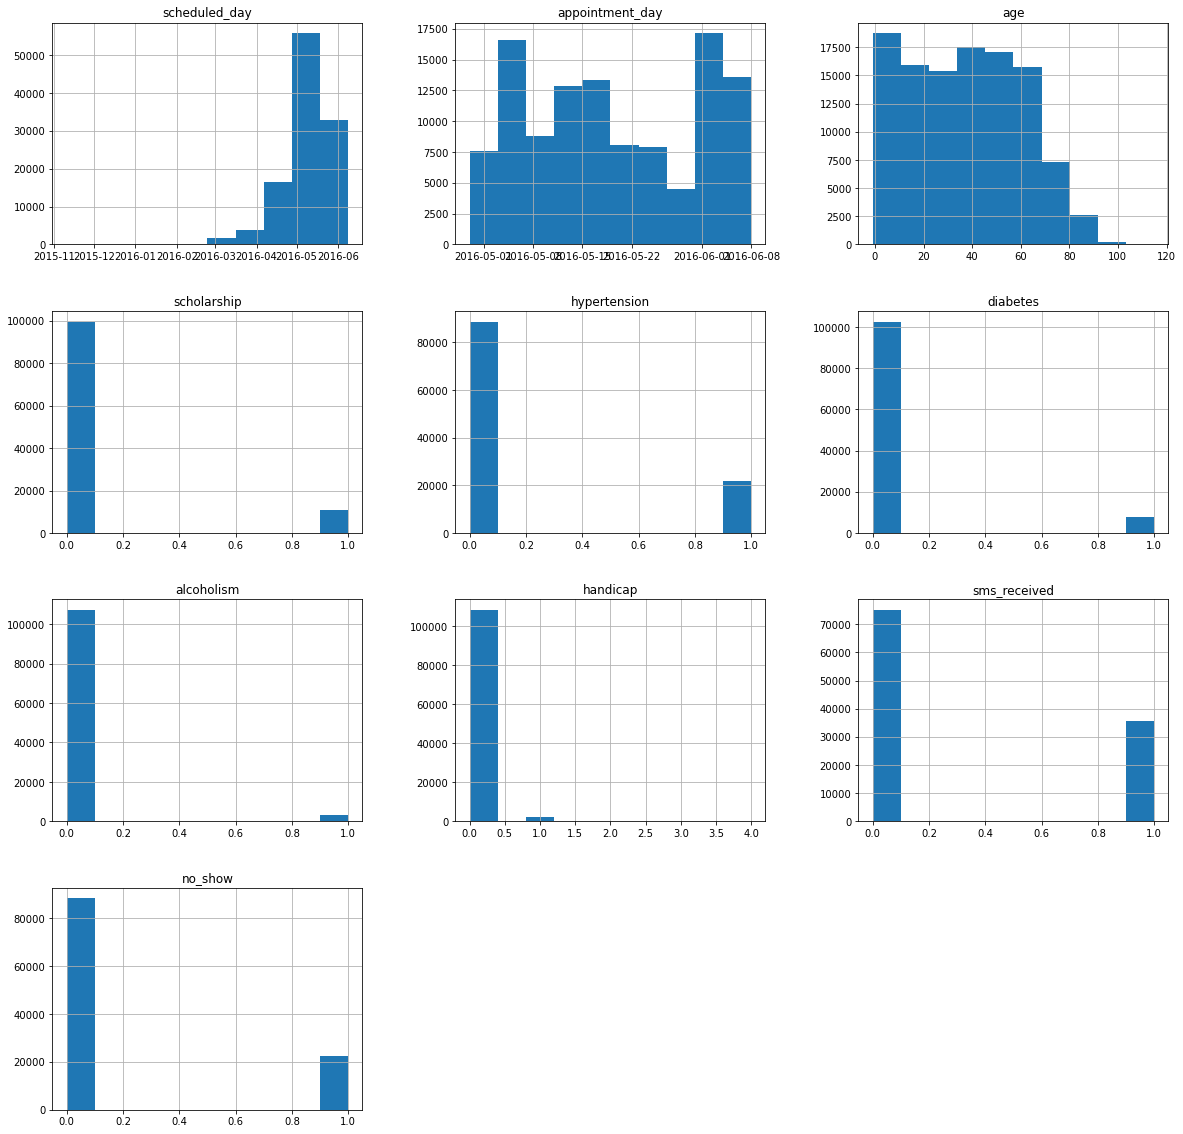

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize = [20, 20])


<AxesSubplot:>

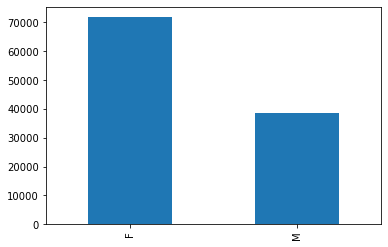

In [11]:
df['gender'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='gender'>

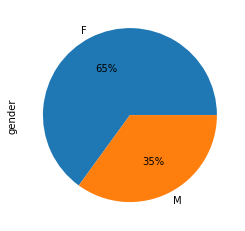

In [12]:
df.gender.value_counts().plot(kind='pie', autopct='%.0f%%')

<AxesSubplot:ylabel='gender'>

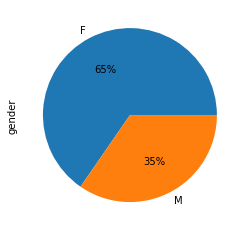

In [13]:
df_noshow = df.query('no_show == 1')
df_noshow.gender.value_counts().plot(kind='pie', autopct='%.0f%%')

<AxesSubplot:ylabel='gender'>

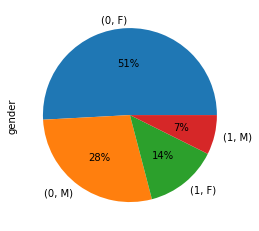

In [14]:
df_no_show_not_seek =  df.query('alcoholism == 0 and hypertension == 0 and diabetes == 0  and handicap == 0').groupby(['no_show'])
df_no_show_not_seek.gender.value_counts().plot(kind='pie', autopct='%.0f%%')

<AxesSubplot:ylabel='gender'>

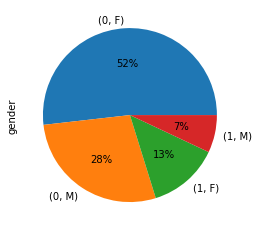

In [15]:
df_no_show_seek =  df.query('alcoholism == 0 or hypertension == 0 or diabetes == 0  or handicap == 0').groupby(['no_show'])
df_no_show_seek.gender.value_counts().plot(kind='pie', autopct='%.0f%%')

### Research Question 2 and 4  (Is the case that a patient get scholarship will help to show up ? / Is patient going to show up wether they are sick or not ?)

<AxesSubplot:ylabel='no_show'>

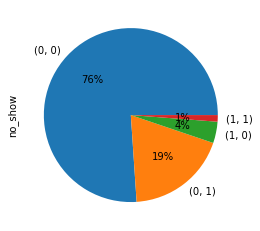

In [16]:
# Explore the dataset based on scholarship
df_scholar_men = df.query('gender == "M"').groupby(['scholarship'])

df_scholar_men.no_show.value_counts().plot(kind='pie', autopct='%.0f%%')

<AxesSubplot:ylabel='no_show'>

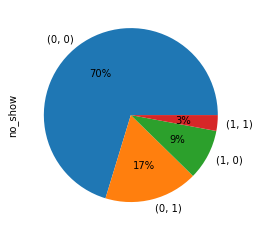

In [17]:
df_scholar_women = df.query('gender == "F"').groupby(['scholarship'])

df_scholar_women.no_show.value_counts().plot(kind='pie', autopct='%.0f%%')

### Research Question 3  (What days of week patient sow up easily for they appointment ?)

In [18]:
# Let's first transform day to get what days is suitable for patients.
df_day_week = df.copy()
df_day_week['appointment_day'] =  df['appointment_day'].dt.dayofweek
df_day_week['scheduled_day'] =  df['scheduled_day'].dt.dayofweek
df_day_week.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,4,4,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,4,4,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,4,4,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,4,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,4,4,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [19]:
df_day_week.sample(10)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
7575,F,3,3,10,MÁRIO CYPRESTE,0,0,0,0,0,0,0
40408,M,1,2,47,SÃO CRISTÓVÃO,0,0,0,0,0,0,0
95395,F,2,3,11,MARIA ORTIZ,0,0,0,0,0,1,0
39105,M,1,3,29,JOANA D´ARC,0,0,0,0,0,0,0
62035,F,0,0,31,ILHA DO BOI,0,0,0,0,0,0,0
27175,F,4,4,77,RESISTÊNCIA,0,1,0,0,0,0,0
44947,F,4,4,22,SÃO JOSÉ,0,0,0,0,0,1,0
80225,F,4,4,11,FONTE GRANDE,0,0,0,0,0,0,0
31930,M,2,4,35,RESISTÊNCIA,0,0,0,0,0,0,0
79741,F,3,1,33,CENTRO,0,1,0,0,0,1,0


array([[<AxesSubplot:title={'center':'scheduled_day'}>,
        <AxesSubplot:title={'center':'appointment_day'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handicap'}>,
        <AxesSubplot:title={'center':'sms_received'}>],
       [<AxesSubplot:title={'center':'no_show'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

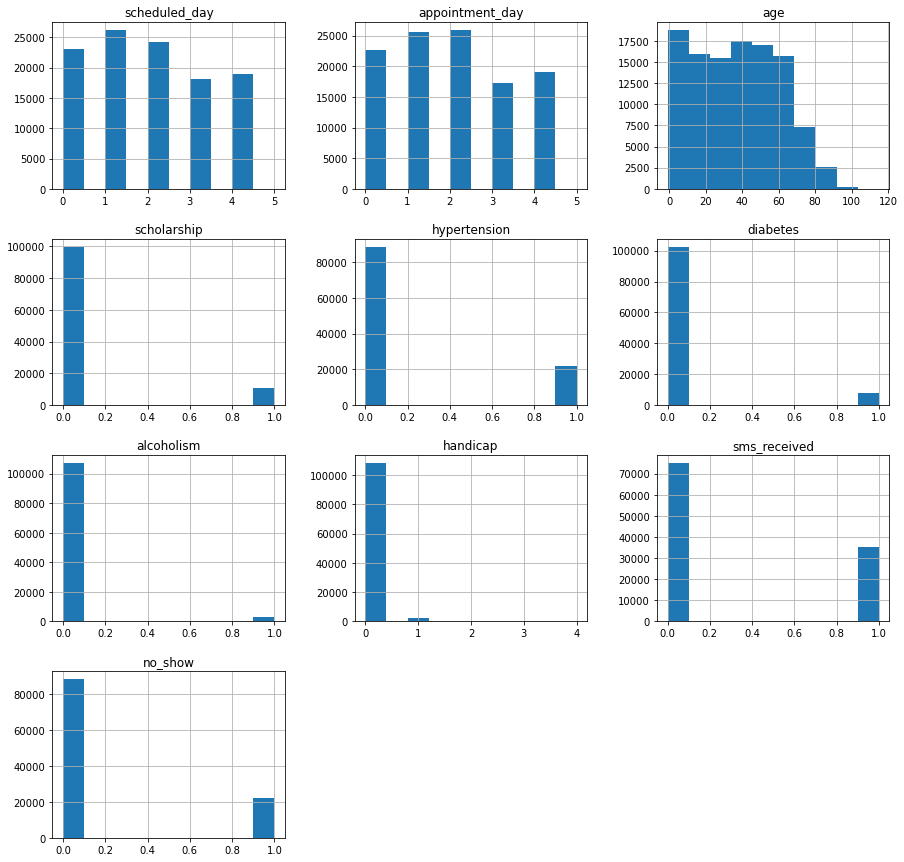

In [20]:
df_day_week.hist(figsize= [15,15])

array([[<AxesSubplot:xlabel='scheduled_day', ylabel='scheduled_day'>,
        <AxesSubplot:xlabel='appointment_day', ylabel='scheduled_day'>,
        <AxesSubplot:xlabel='age', ylabel='scheduled_day'>,
        <AxesSubplot:xlabel='scholarship', ylabel='scheduled_day'>,
        <AxesSubplot:xlabel='hypertension', ylabel='scheduled_day'>,
        <AxesSubplot:xlabel='diabetes', ylabel='scheduled_day'>,
        <AxesSubplot:xlabel='alcoholism', ylabel='scheduled_day'>,
        <AxesSubplot:xlabel='handicap', ylabel='scheduled_day'>,
        <AxesSubplot:xlabel='sms_received', ylabel='scheduled_day'>,
        <AxesSubplot:xlabel='no_show', ylabel='scheduled_day'>],
       [<AxesSubplot:xlabel='scheduled_day', ylabel='appointment_day'>,
        <AxesSubplot:xlabel='appointment_day', ylabel='appointment_day'>,
        <AxesSubplot:xlabel='age', ylabel='appointment_day'>,
        <AxesSubplot:xlabel='scholarship', ylabel='appointment_day'>,
        <AxesSubplot:xlabel='hypertension', ylabel='

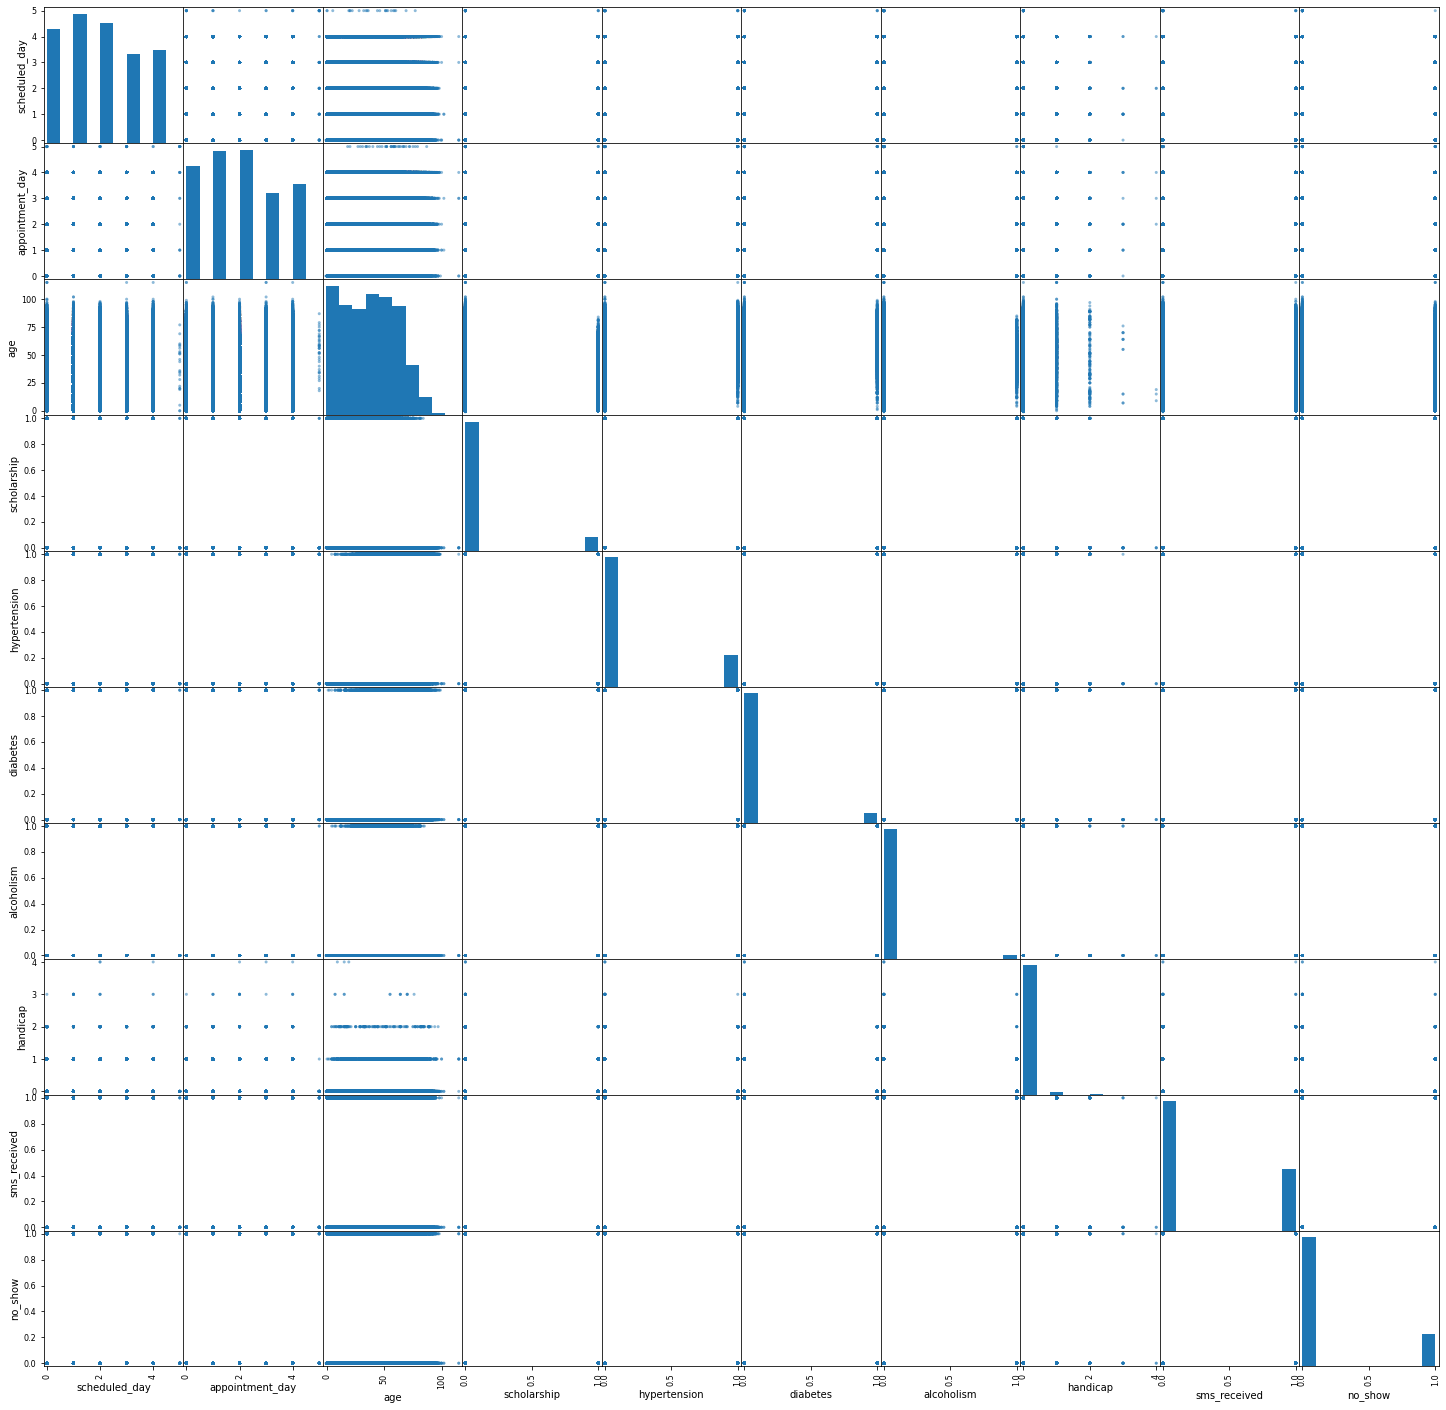

In [21]:
# Quick Explore with neighbourhood
df_day_week_group_age = df_day_week.query('no_show == 1').groupby(['neighbourhood'])

pd.plotting.scatter_matrix(df_day_week, figsize = (25,25))

<a id='conclusions'></a>
## Conclusions

>    1. Is the number of gender equals through the dataset ?
    > **Answer** : 
        > We have **65%** Women and **35%** Men.
        So no the dataset is not equally provided for gender feature
        
>    2. Is the case that a patient get scholarship will help to show up ?
        > **Answer** : 
            The scholarship is not deterministic for this exploration.
>    3. What days of week patient sow up easily for they appointment ?
    > **Answer** :
    >   Quick comparaison of appointment days of week and sheduled days of week show that patients come regularly for appointment on (Monday, Wednesday and Friday).
    > __Tuesday and Thursday patients number decrease a little__
>    4. Is patient going to show up wether they are sick or not ?
        > **Answer** : 
        > No matter they are sick or not the pies charts show us that we have arround the same behaviour for all patients

## So patients sheduled for (Monday, Wednesday and Friday) will mostly show_up


## Submitting your Project 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])